In [ ]:
# Ridge same as linear regression but does not consider outliers. Since it normalizes the data before processing it.

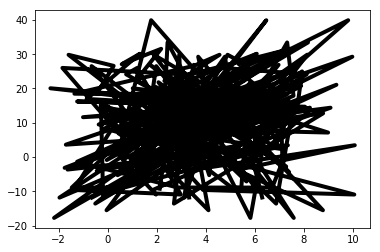

Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explain variance score = 0.84
R2 score = 0.83


In [10]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

X = []
y = []
with open("data_multivar.txt", 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        xt, yt = data[:-1], data[-1]
        X.append(xt)
        y.append(yt)

# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
#X_train = np.array(X[:num_training]).reshape((num_training,1))
X_train = np.array(X[:num_training])
y_train = np.array(y[:num_training])

# Test data
#X_test = np.array(X[num_training:]).reshape((num_test,1))
X_test = np.array(X[num_training:])
y_test = np.array(y[num_training:])

ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
ridge_regressor.fit(X_train, y_train)

# Predict the output
y_test_pred_ridge = ridge_regressor.predict(X_test)


# Plot outputs
import matplotlib.pyplot as plt

#plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred_ridge, color='black', linewidth=4)
#plt.xticks(())
#plt.yticks(())
plt.show()


# Measure performance
import sklearn.metrics as sm

print ("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2) )
print ("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2) )
print ("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2) )
print ("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2) )
print ("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))


